In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import the data set

In [2]:
df = pd.read_csv("titanic.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.shape

(891, 12)

In [39]:
df.dtypes

PassengerId         int64
Survived            int64
Pclass              int64
Name               object
Sex                object
Age               float64
SibSp               int64
Parch               int64
Ticket             object
Fare              float64
Embarked           object
AgeGroup         category
FamilyMembers       int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# DATA CLEANING

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df=df.drop("Cabin",axis=1)

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [11]:
df["Age"].skew()

np.float64(0.38910778230082704)

In [12]:
df["Age"]=df["Age"].fillna(df["Age"].mean())

In [13]:
df.fillna(df["Embarked"].mode()[0],inplace = True)

In [14]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# DATA ANALYSIS

In [15]:
df["PassengerId"].count()

np.int64(891)

In [16]:
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [17]:
##most of the people died in the incident

In [18]:
df.groupby("Sex")["Survived"].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [19]:
##female survived more in the incident

In [20]:
df.groupby("Pclass")["Survived"].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [21]:
## passengers from p1 survived more

# BINING

In [22]:
bins=[0,18,36,72]
labels=["child","adult","old"]
df["AgeGroup"]=pd.cut(df["Age"],bins=bins,labels=labels)

In [23]:
df.groupby("AgeGroup")["Survived"].mean()

C:\Users\Eshwari Racha\AppData\Local\Temp\ipykernel_24308\2602041343.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("AgeGroup")["Survived"].mean()


AgeGroup
child    0.503597
adult    0.359066
old      0.367876
Name: Survived, dtype: float64

In [24]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,old
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,adult
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,adult
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,adult
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,adult


In [25]:
##child survived more in the incident

In [26]:
df.sort_values(by="Fare",ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.000000,0,0,PC 17755,512.3292,C,adult
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.000000,0,1,PC 17755,512.3292,C,adult
258,259,1,1,"Ward, Miss. Anna",female,35.000000,0,0,PC 17755,512.3292,C,adult
438,439,0,1,"Fortune, Mr. Mark",male,64.000000,1,4,19950,263.0000,S,old
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.000000,3,2,19950,263.0000,S,adult
...,...,...,...,...,...,...,...,...,...,...,...,...
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,29.699118,0,0,239853,0.0000,S,adult
271,272,1,3,"Tornquist, Mr. William Henry",male,25.000000,0,0,LINE,0.0000,S,adult
263,264,0,1,"Harrison, Mr. William",male,40.000000,0,0,112059,0.0000,S,old
466,467,0,2,"Campbell, Mr. William",male,29.699118,0,0,239853,0.0000,S,adult


In [27]:
## the customers who are paying more are surviving more

In [28]:
df["FamilyMembers"]=df["SibSp"]+df["Parch"]

In [29]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup,FamilyMembers
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,adult,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,old,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,adult,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,adult,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,adult,0


In [30]:
df["FamilyMembers"].sum()

np.int64(806)

In [31]:
##806 out of 890 were family members i.e 90% are family members

In [32]:
df["Name"].str.contains("Mr.").sum()

np.int64(647)

In [33]:
##70-80% of the passengers were maried

# Data Visualisation

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

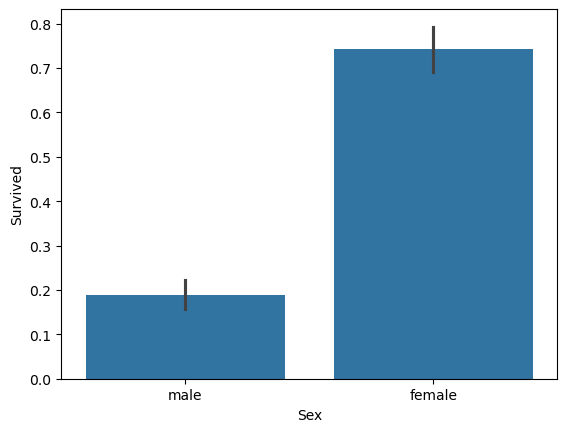

In [36]:
sns.barplot(x="Sex",y="Survived",data=df)
plt.show()

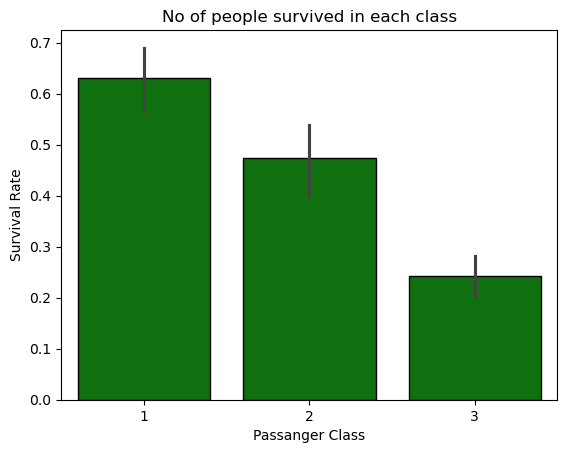

In [42]:
sns.barplot(x="Pclass",y="Survived",data=df,color="green",edgecolor="black")
plt.title("No of people survived in each class")
plt.xlabel("Passanger Class")
plt.ylabel("Survival Rate")
plt.show()

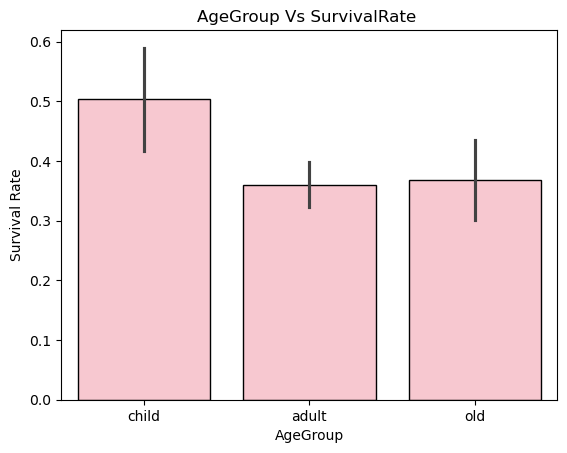

In [43]:
sns.barplot(x="AgeGroup",y="Survived",data=df,color="pink",edgecolor="black")
plt.title("AgeGroup Vs SurvivalRate ")
plt.xlabel("AgeGroup")
plt.ylabel("Survival Rate")
plt.show()

# DASHBOARD

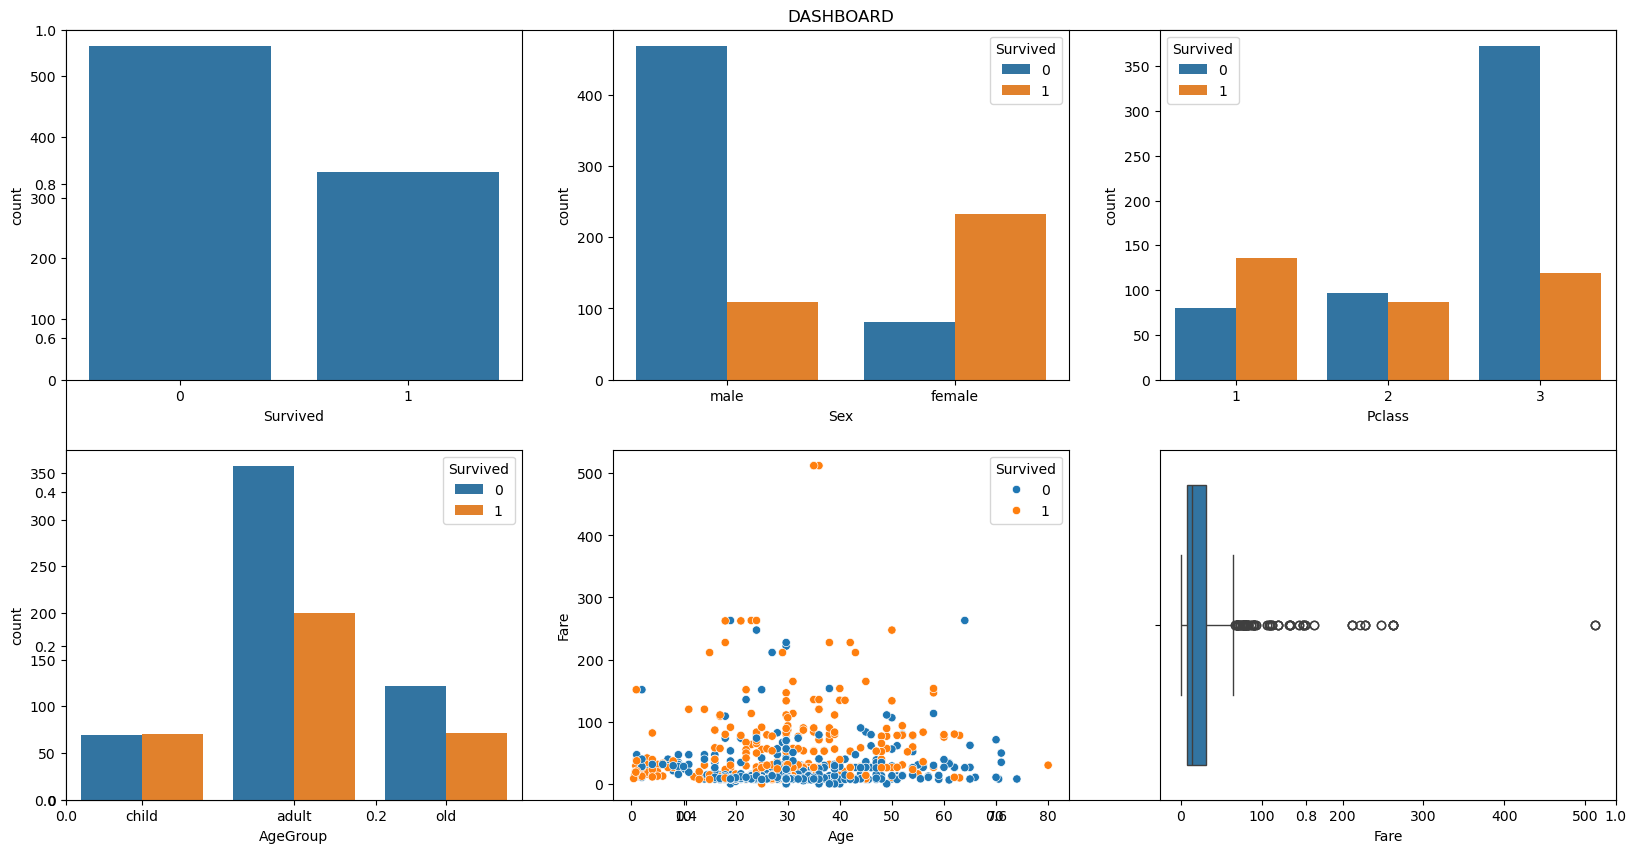

In [40]:
plt.figure(figsize=(20,10))
plt.title("DASHBOARD")
plt.subplot(2,3,1)
sns.countplot(x="Survived",data=df)
plt.subplot(2,3,2)
sns.countplot(x="Sex",hue="Survived",data=df)
plt.subplot(2,3,3)
sns.countplot(x="Pclass",hue="Survived",data=df)
plt.subplot(2,3,4)
sns.countplot(x="AgeGroup",hue="Survived",data=df)
plt.subplot(2,3,5)
sns.scatterplot(x="Age",y="Fare",hue="Survived",data=df)
plt.subplot(2,3,6)
sns.boxplot(x="Fare",data=df)
plt.show()

# DATA STORY TELLING

1. Most people have died in the incident.
2. Most of the males died in the incident.
3. Most of the people are survived in the class 1.
4. Survival rate of the children are more as compared to adults and old.
5. People who are paying more ,surviving more.
6. Around 20 people are paying more than the avg people.